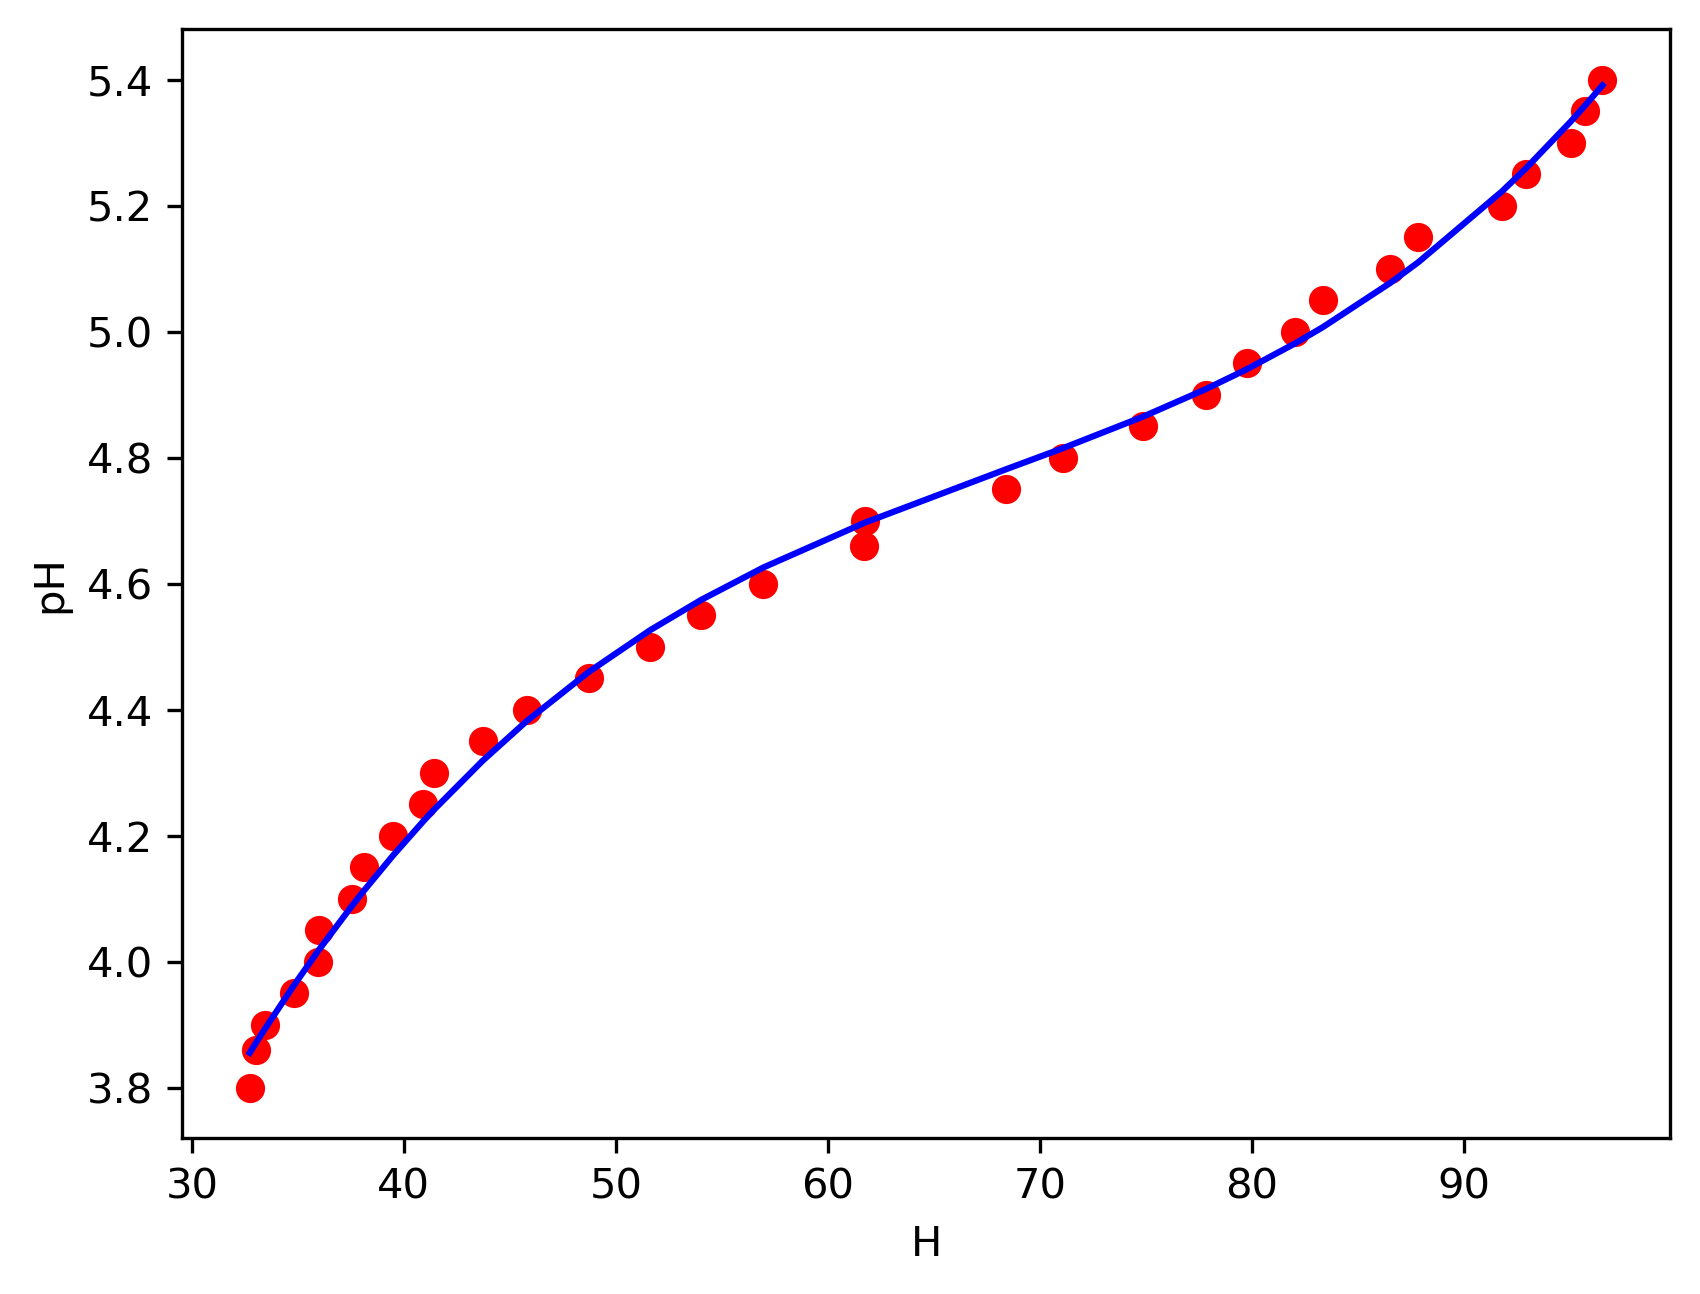

均方误差:  0.0004123448508191349
平均绝对误差:  0.017255238652528808
判定系数:  0.9972491630101923


<Figure size 1920x1440 with 0 Axes>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 载入数据
dataset = pd.read_csv("G:/JMU/passage/picture/all/blue.csv")
X = dataset.iloc[:,7:8].values
y = dataset.iloc[:,-1].values

# 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 转化多项式特征
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

# 训练模型
model = LinearRegression()
model.fit(X_poly_train, y_train)

# 可视化结果
plt.scatter(X, y, color='red')
plt.plot(X, model.predict(poly_reg.fit_transform(X)), color='blue')
plt.xlabel('H')
plt.ylabel('pH')
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.show()
plt.savefig('plot1.png', dpi=300)

# 在测试集上做预测
y_pred = model.predict(X_poly_test)

# 计算评价指标
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出评价指标
print('均方误差: ', mse)
print('平均绝对误差: ', mae)
print('判定系数: ', r2)

In [5]:
#在训练集上的评价指标
# 预测训练集结果
y_predtrain = model.predict(X_poly_train)

# 计算评价指标
mse_train = mean_squared_error(y_train, y_predtrain)
mae_train = mean_absolute_error(y_train, y_predtrain)
r2_train = r2_score(y_train, y_predtrain)

# 输出评价指标
print('均方误差: ', mse_train)
print('平均绝对误差: ', mae_train)
print('判定系数: ', r2_train)


均方误差:  0.0008051108734853334
平均绝对误差:  0.024740596202789976
判定系数:  0.9963432401421163


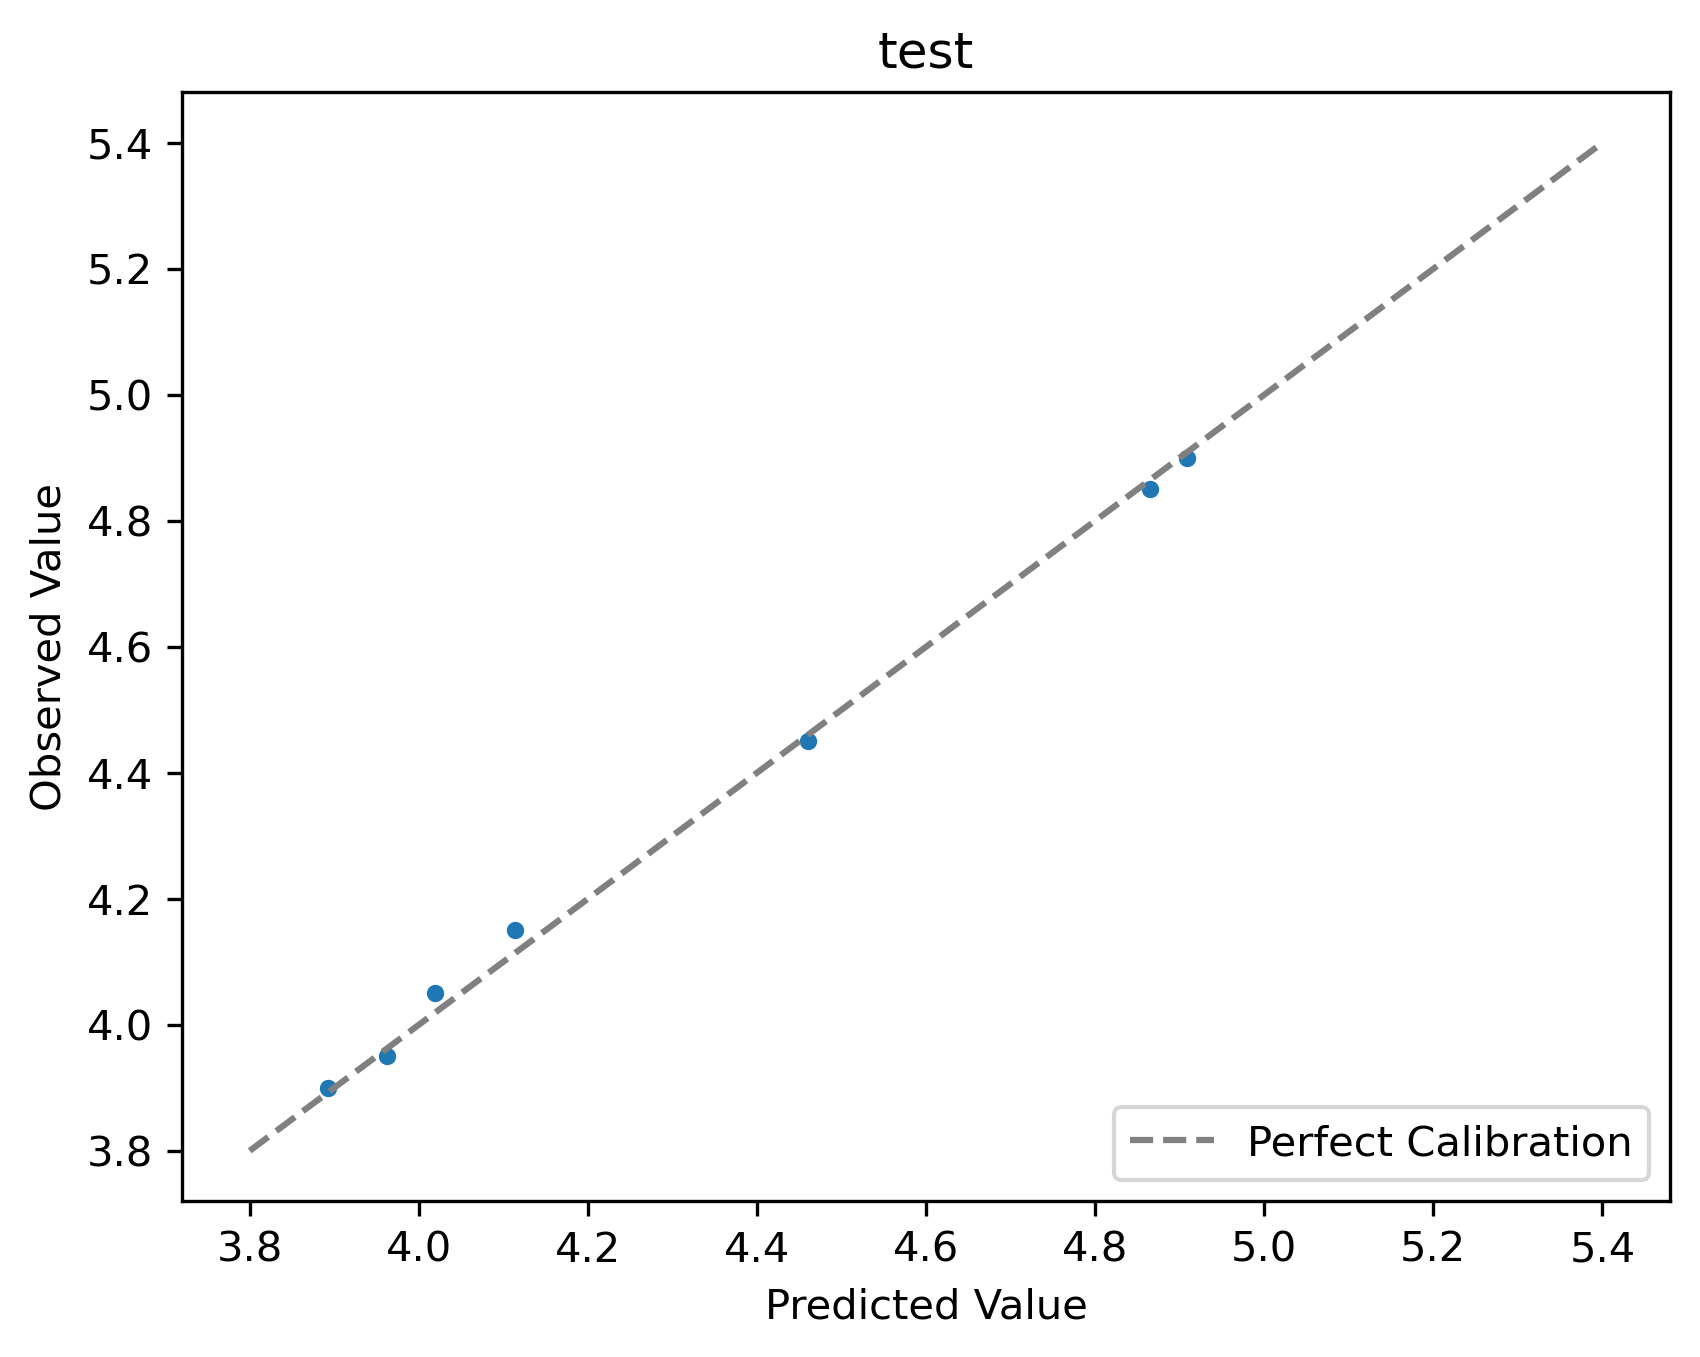

<Figure size 1920x1440 with 0 Axes>

In [11]:
# 绘制预测-观测图
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, s=10)
ax.plot([3.8,5.4], [3.8,5.4], '--', color='gray', label='Perfect Calibration')
plt.title('test')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Observed Value')
ax.legend(loc='lower right')
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.show()
plt.savefig('plot1.png', dpi=300)

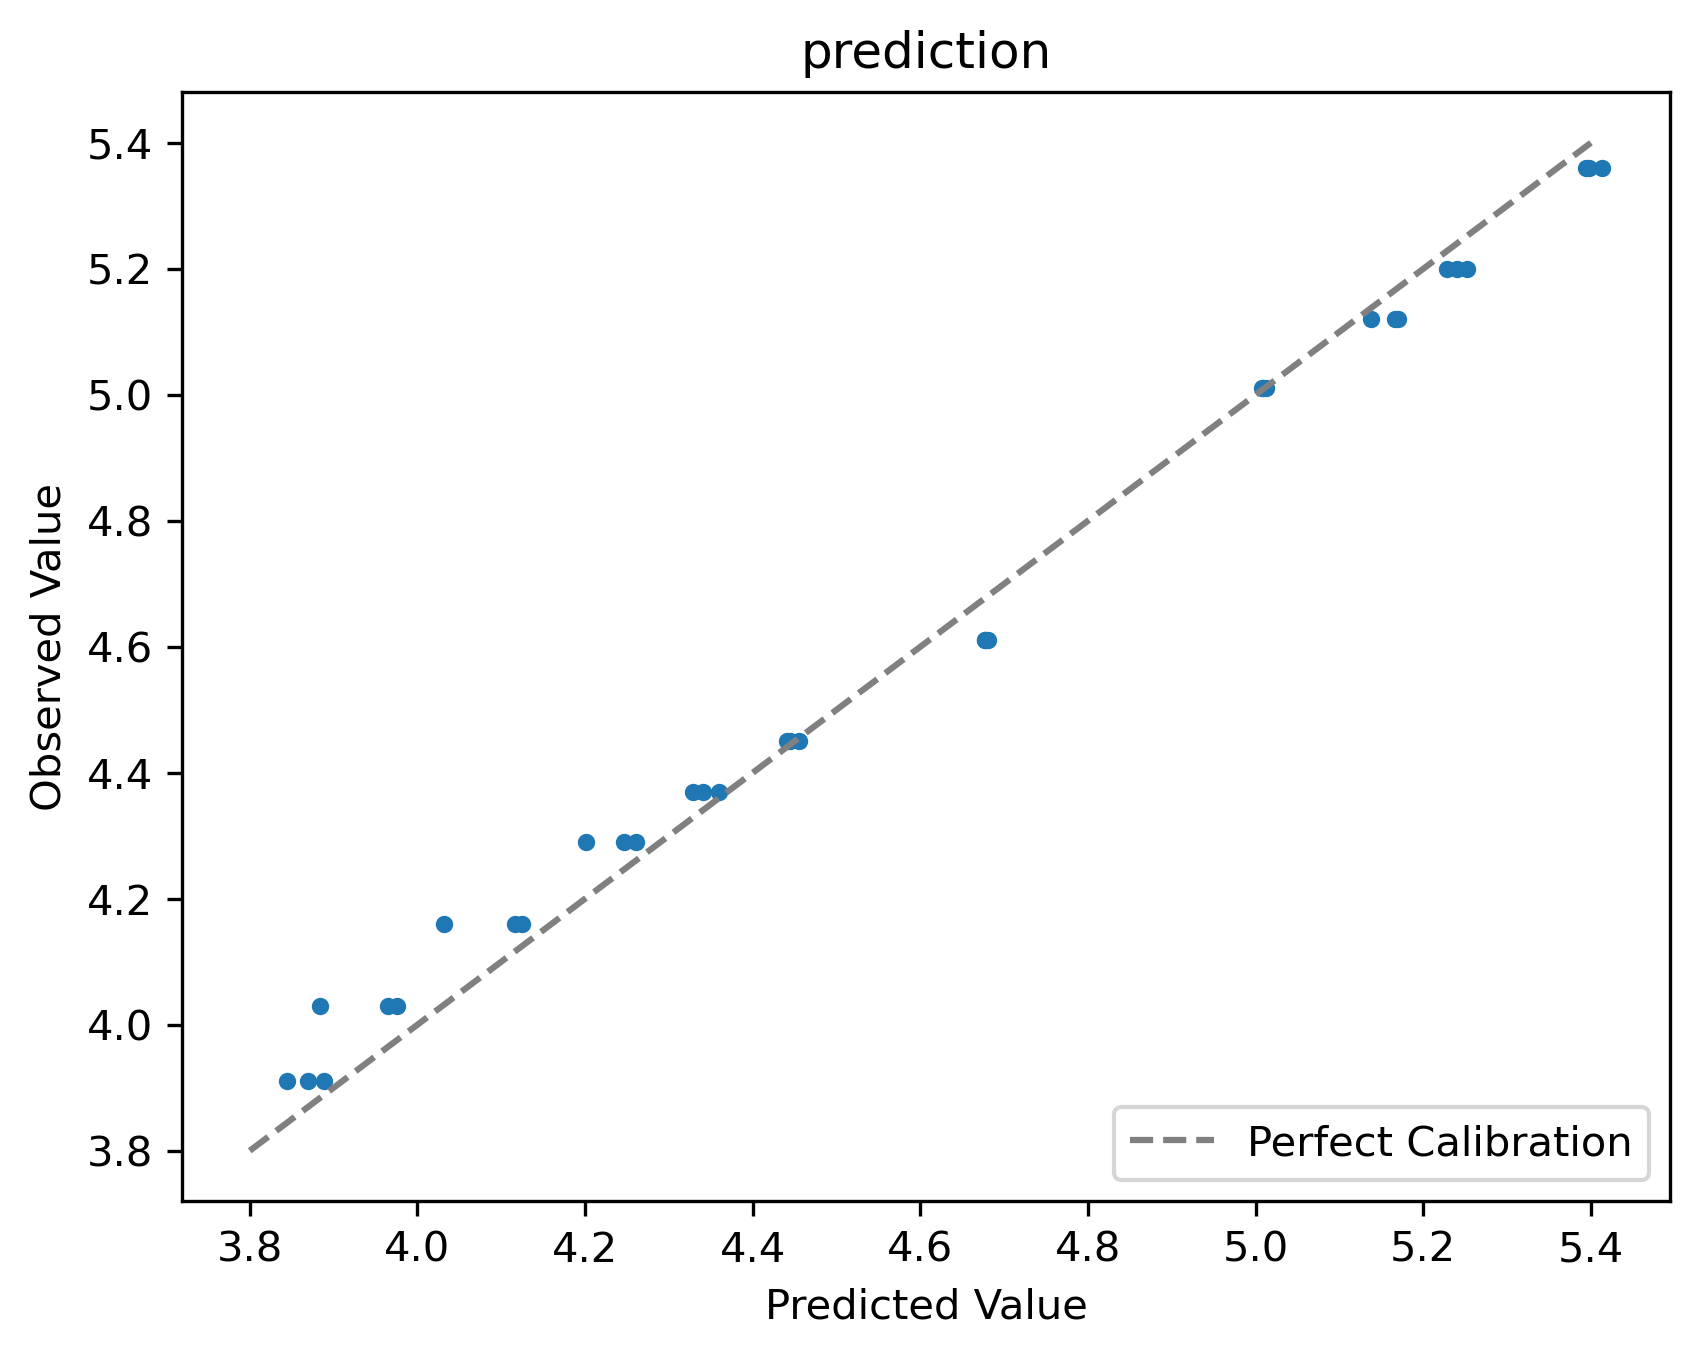

均方误差:  0.0029683482867860975
平均绝对误差:  0.043486033082005604
判定系数:  0.9871528571279986


<Figure size 1920x1440 with 0 Axes>

In [13]:
#在新数据上预测
new_data = pd.read_csv("G:/JMU/passage/picture/test/blue.csv")
X_new = new_data.iloc[:,7:8].values

# Transform features to polynomial features
X_new_poly = poly_reg.fit_transform(X_new)
# Predict new data
y_new = model.predict(X_new_poly)
y_ture = new_data.iloc[:, -1]

# 绘制预测-观测图
fig, ax = plt.subplots()
ax.scatter(y_new, y_ture, s=10)
ax.plot([3.8,5.4], [3.8,5.4], '--', color='gray', label='Perfect Calibration')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Observed Value')
ax.legend(loc='lower right')
plt.title('prediction')
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.show()
plt.savefig('plot1.png', dpi=300)

# 计算评价指标
mse1 = mean_squared_error(y_ture, y_new)
mae1 = mean_absolute_error(y_ture, y_new)
r21 = r2_score(y_ture, y_new)

# 输出评价指标
print('均方误差: ', mse1)
print('平均绝对误差: ', mae1)
print('判定系数: ', r21)

In [8]:
# 获取多项式函数的系数
coefs = model.coef_
intercept = model.intercept_

# 构造多项式函数字符串
poly_str = str(intercept)
for i in range(1, 4):
    poly_str += " + " + str(coefs[i]) + "x^" + str(i)

print("Polynomial function: ", poly_str)

Polynomial function:  0.4420948084247529 + 0.1667775203434046x^1 + -0.0022744085271397428x^2 + 1.1164975933711722e-05x^3
